# Zeitbezogene Analysen

Das studentische Verhalten wird nachfolgend in zeitlicher Hinsicht betrachtet.

**Zeitraum der aufgezeichneten Log-Einträge**
Montag, 12.10.2020 bis Donnerstag, 03.06.2021
Länge des Zeitraums: 7 Monate, 3 Wochen, 2 Tage
Länge in Tagen: 235 Tage
Länge in Wochen: 33 Wochen, 4 Tage

**Prüfungszeitraum I**
Freitag, 22.01.2021 bis Samstag, 06.02.2021
Länge in Tagen: 16 Tage (inkl. Sonntage)

**Prüfungszeitraum II**
Freitag, 12.03.2021 bis Samstag, 27.03.2021
Länge in Tagen: 16 Tage (inkl. Sonntage)

### Import von Bibliotheken und anderen Erweiterungen

In [704]:
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker
import seaborn as sns
from IPython.core.display_functions import display

### Definitionen zur Darstellung der Visualisierungen

In [705]:
sns.set_theme(style='white', font_scale=1.2, palette='Spectral')

### Herstellung der Verbindung zur MySQL-Datenbank

In [706]:
user = "root"
password = "root"
host = "localhost"
database = "vfh_moodle_ws20"
port = 3306

engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}', pool_recycle=port)
connection = engine.connect()

### Selektiver Import der Arbeitsdaten aus der MySQL-Datenbank

**Begrenzung der Selektion auf Studenten**

In [707]:
# Gegenstand der Untersuchungen sind nur Datensätze von Benutzern, die zuvor als Studenten identifiziert wurden.
query = """SELECT * FROM moodle_data WHERE userstatus = 'student' OR relateduserstatus = 'student'"""
moodle_data = pd.read_sql(query, connection) # Definition der Arbeitsdaten

# Konvertierung des Datentyps des Tabellenmerkmals timecreated
moodle_data['timecreated'] = pd.to_datetime(moodle_data['timecreated'], unit='s')

# Ausgabe der Arbeitsdaten
moodle_data

,courseid,Studiengang,userid,userstatus,relateduserid,relateduserstatus,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
0,0,0,1,student,-2,other,sent,\core\event\notification_sent,notifications,3232247,2020-10-12 04:54:03,,0
1,629,1,13,student,-2,other,viewed,\core\event\user_profile_viewed,user,3837,2020-10-17 09:00:11,,0
2,0,0,-2,other,24,student,sent,\core\event\notification_sent,notifications,3281851,2020-10-18 14:27:05,,0
3,0,0,-2,other,1,student,sent,\core\event\notification_sent,notifications,3281852,2020-10-18 14:27:05,,0
4,0,0,1,student,-2,other,sent,\core\event\notification_sent,notifications,3290921,2020-10-19 15:54:03,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
333768,28512,3,109,student,109,student,deleted,\mod_forum\event\discussion_subscription_deleted,forum_discussion_subs,45244,2021-06-03 21:11:35,,0
333769,28512,3,109,student,0,other,viewed,\core\event\course_viewed,,0,2021-06-03 21:12:09,,0
333770,0,0,109,student,109,student,viewed,\core\event\dashboard_viewed,,0,2021-06-03 21:13:25,,0
333771,28514,3,109,student,0,other,viewed,\core\event\course_viewed,,0,2021-06-03 21:13:36,,0


### Verteilung der Log-Einträge im Gesamtzeitraum

In [708]:
# Ausgabe statistischer Werte für das Tabellenmerkmal timecreated
display(moodle_data.timecreated.describe(datetime_is_numeric=True))  # Daten müssen für diese Ausgabe als datetime typisiert sein.

count                           333773
mean     2021-01-28 01:46:20.956416512
min                2020-10-12 03:54:58
25%                2020-11-30 10:42:54
50%                2021-01-22 14:14:32
75%                2021-03-25 11:43:13
max                2021-06-03 22:38:39
Name: timecreated, dtype: object

**Ergebnis:** Nur ca. die Hälfte aller Log-Einträge werden innerhalb der Vorlesungszeit bis kurz vor Beginn des Prüfungszeitraums I protokolliert. Ziemlich genau bis zum Ende des Prüfungszeitraums II werden 75 Prozent aller Log-Einträge festgestellt. 25 Prozent entfallen auf das anschließende Sommersemester 2021.

In [709]:
moodle_data['year'] = moodle_data.timecreated.dt.year
moodle_data['month'] = moodle_data.timecreated.dt.month_name()
moodle_data['week'] = moodle_data.timecreated.dt.isocalendar().week
moodle_data['day'] = moodle_data.timecreated.dt.day
moodle_data['hour'] = moodle_data.timecreated.dt.hour
moodle_data['year_month_day'] = moodle_data['year'].astype(str) + " " + moodle_data['month'].astype(str) + " " + moodle_data['day'].astype(str)
moodle_data['dayname'] = moodle_data.timecreated.dt.day_name()
moodle_data

,courseid,Studiengang,userid,userstatus,relateduserid,relateduserstatus,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid,year,month,week,day,hour,year_month_day,dayname
0,0,0,1,student,-2,other,sent,\core\event\notification_sent,notifications,3232247,2020-10-12 04:54:03,,0,2020,October,42,12,4,2020 October 12,Monday
1,629,1,13,student,-2,other,viewed,\core\event\user_profile_viewed,user,3837,2020-10-17 09:00:11,,0,2020,October,42,17,9,2020 October 17,Saturday
2,0,0,-2,other,24,student,sent,\core\event\notification_sent,notifications,3281851,2020-10-18 14:27:05,,0,2020,October,42,18,14,2020 October 18,Sunday
3,0,0,-2,other,1,student,sent,\core\event\notification_sent,notifications,3281852,2020-10-18 14:27:05,,0,2020,October,42,18,14,2020 October 18,Sunday
4,0,0,1,student,-2,other,sent,\core\event\notification_sent,notifications,3290921,2020-10-19 15:54:03,,0,2020,October,43,19,15,2020 October 19,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333768,28512,3,109,student,109,student,deleted,\mod_forum\event\discussion_subscription_deleted,forum_discussion_subs,45244,2021-06-03 21:11:35,,0,2021,June,22,3,21,2021 June 3,Thursday
333769,28512,3,109,student,0,other,viewed,\core\event\course_viewed,,0,2021-06-03 21:12:09,,0,2021,June,22,3,21,2021 June 3,Thursday
333770,0,0,109,student,109,student,viewed,\core\event\dashboard_viewed,,0,2021-06-03 21:13:25,,0,2021,June,22,3,21,2021 June 3,Thursday
333771,28514,3,109,student,0,other,viewed,\core\event\course_viewed,,0,2021-06-03 21:13:36,,0,2021,June,22,3,21,2021 June 3,Thursday


&nbsp;
**Menge der Log-Einträge pro Woche über den Gesamtzeitraum**

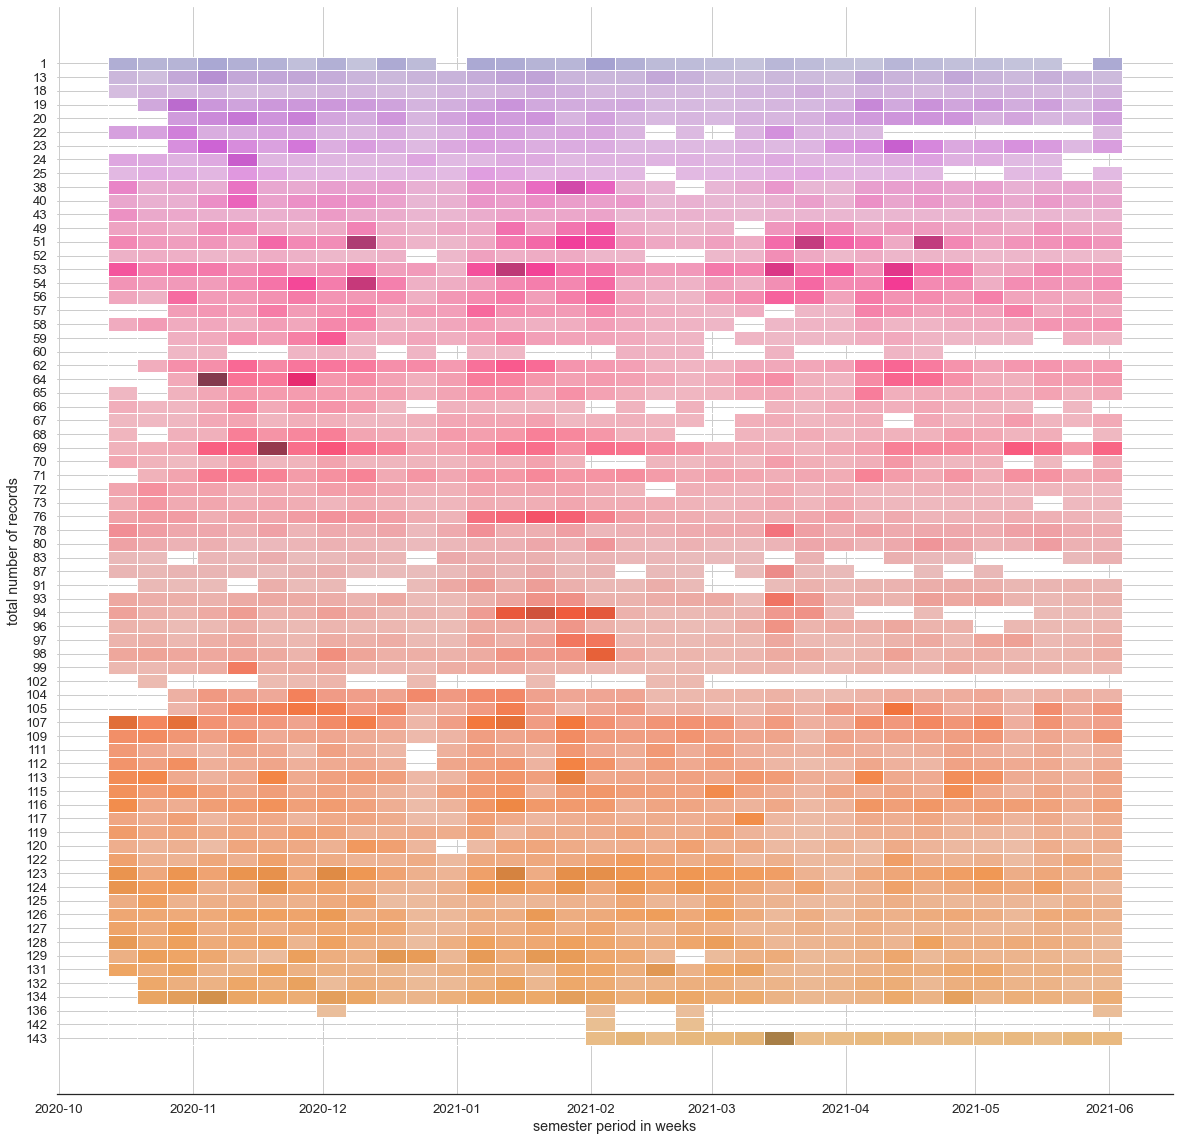

In [710]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(20, 20)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Woche und Studiengang über den Gesamtzeitraum
chart = sns.histplot(x=moodle_data.timecreated, y=moodle_data.userid[moodle_data.userstatus == 'student'].astype(str), bins=34, hue=moodle_data.userid, hue_order=np.sort(moodle_data.userid.unique()), palette='rocket', edgecolor='white', legend=False)

# chart = sns.histplot(x=moodle_data.timecreated, bins=12, hue=moodle_data.action[(moodle_data.courseid == 28238)], hue_order=np.sort(moodle_data.action[(moodle_data.courseid == 28238)].unique()), multiple="stack", alpha=1)

# chart = sns.histplot(x=moodle_data.timecreated, bins=34, hue=moodle_data.Studiengang, hue_order=np.sort(moodle_data.Studiengang.unique()), multiple="stack", alpha=1)

# chart = sns.histplot(x=moodle_data_temp.timecreated, bins=period, discrete=True, hue=moodle_data.action[moodle_data.userid == 109], hue_order=np.sort(moodle_data.action.unique()), multiple="stack", palette='muted', alpha=1)
# chart = sns.histplot(x=md_period.timecreated, bins=period, discrete=True, hue=moodle_data.action, multiple="stack", alpha=1)
# chart = sns.histplot(x=md_period.timecreated, bins=period, discrete=True, hue=moodle_data.action[moodle_data.action != 'viewed'], multiple="stack", alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='both')
chart.set_axisbelow(True)
chart.set_xlabel('semester period in weeks')
chart.set_ylabel('total number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

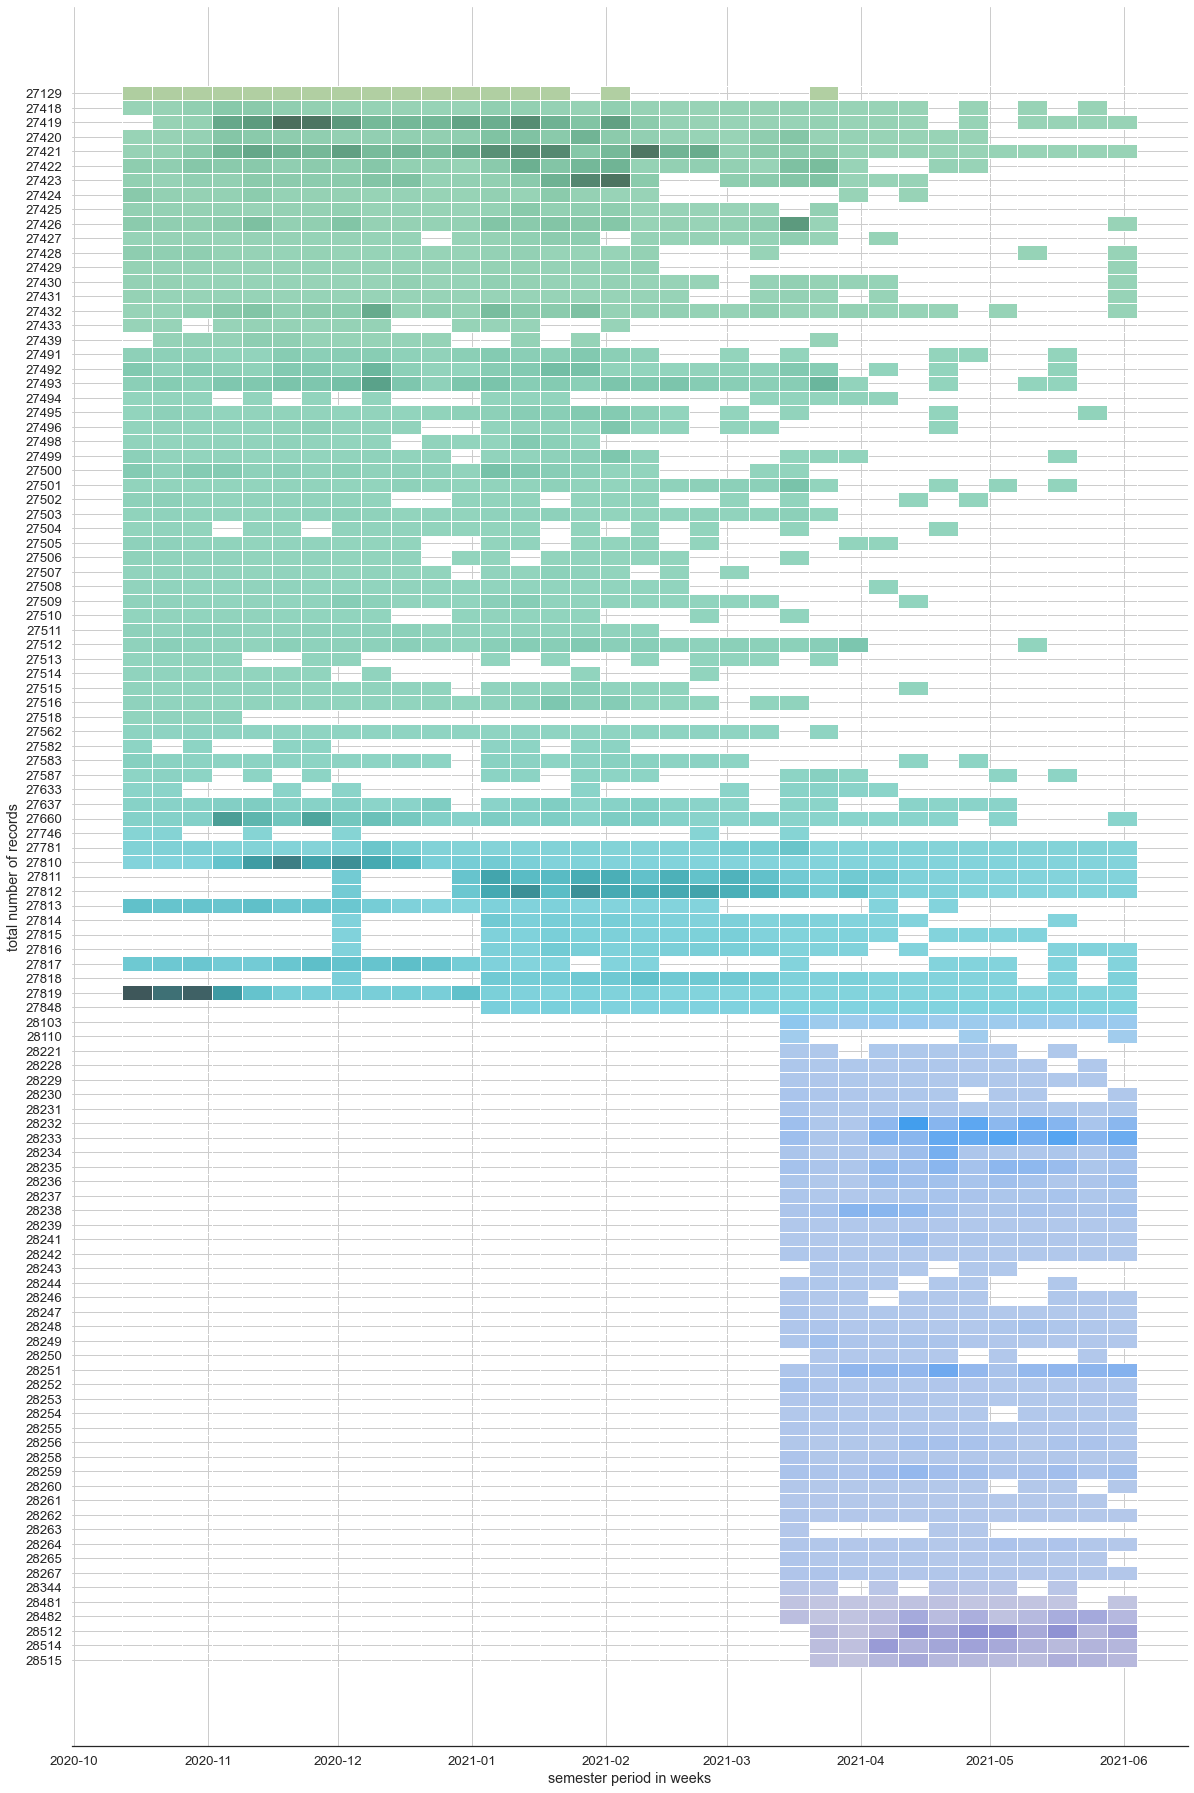

In [711]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(20, 32)) # Größe der Visualisierung (in inch)

# alphabetische Sortierung der Daten zur Ausgabe der Actions in der richtigen Reihenfolge
moodle_data_asc = moodle_data.sort_values(by='courseid', ignore_index=True)

# Visualisierung der Menge der Log-Einträge pro Woche und Studiengang über den Gesamtzeitraum
# zur besseren Darstellung der anderen Werte sollte die viewed-Action exkludiert werden
chart = sns.histplot(x=moodle_data_asc.timecreated, y=moodle_data_asc.courseid[moodle_data_asc.courseid >= 27040].astype(str), bins=34, hue=moodle_data_asc.courseid[moodle_data_asc.courseid >= 27040], hue_order=np.sort(moodle_data_asc.courseid.unique()), palette='crest', edgecolor='white', legend=False)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='both')
chart.set_axisbelow(True)
chart.set_xlabel('semester period in weeks')
chart.set_ylabel('total number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

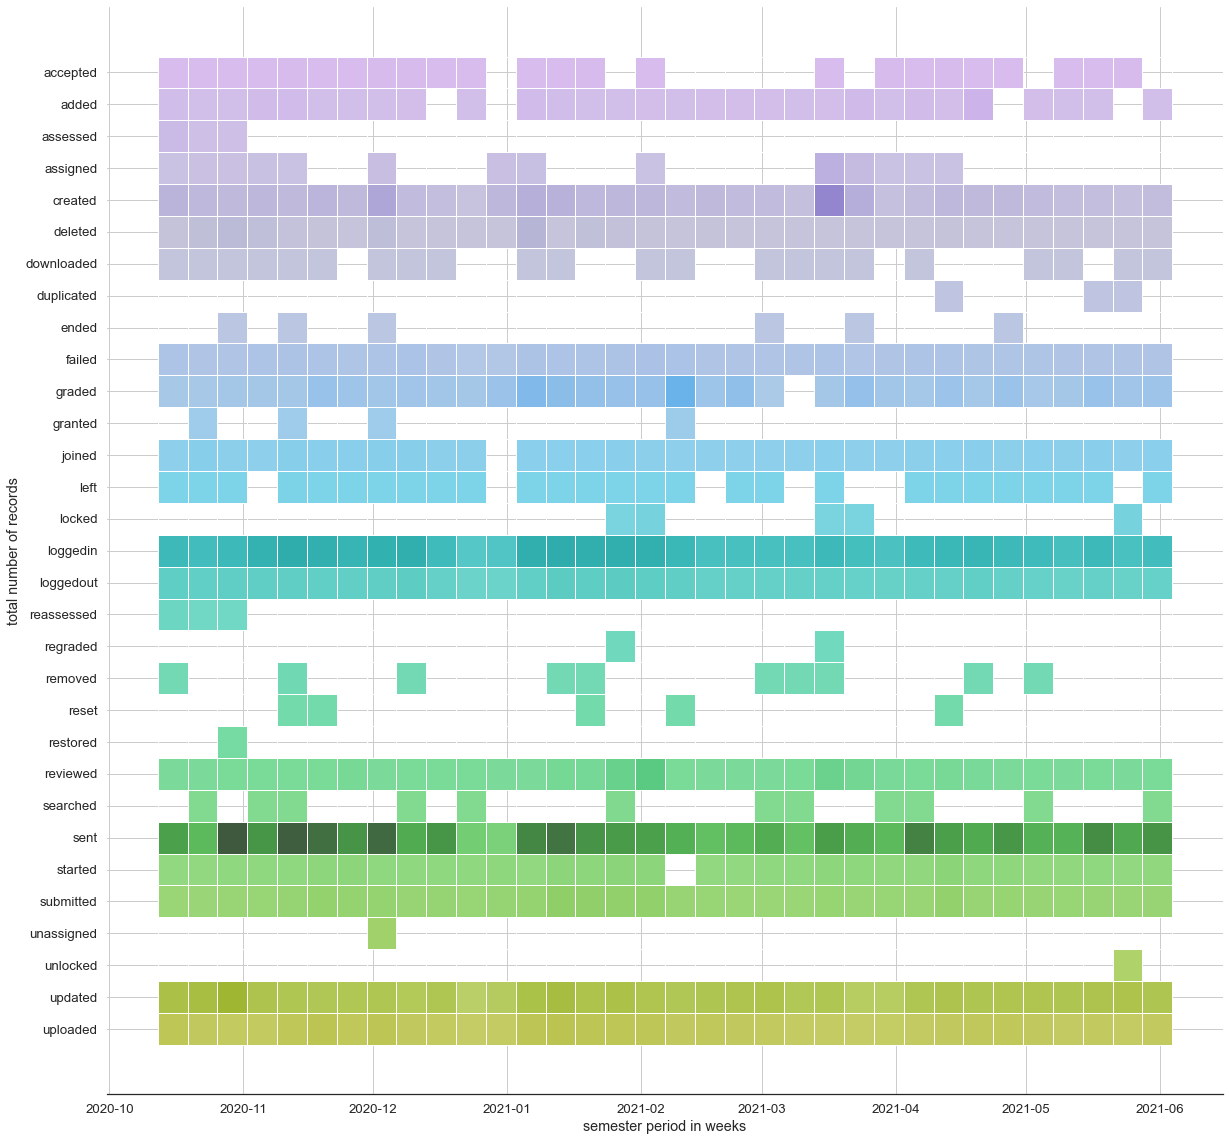

In [712]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(20, 20)) # Größe der Visualisierung (in inch)

# alphabetische Sortierung der Daten zur Ausgabe der Actions in der richtigen Reihenfolge
moodle_data_asc = moodle_data.sort_values(by='action', ignore_index=True)

# Visualisierung der Menge der Log-Einträge pro Woche und Studiengang über den Gesamtzeitraum
# zur besseren Darstellung der anderen Werte sollte die viewed-Action exkludiert werden
chart = sns.histplot(x=moodle_data_asc.timecreated, y=moodle_data_asc.action[moodle_data_asc.action != 'viewed'], bins=34, hue=moodle_data_asc.action, hue_order=np.sort(moodle_data_asc.action.unique()), palette='viridis', edgecolor='white', legend=False)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='both')
chart.set_axisbelow(True)
chart.set_xlabel('semester period in weeks')
chart.set_ylabel('total number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

In [713]:
temp = moodle_data[moodle_data.userstatus == 'student'].sort_values(by=['userid', 'action'])
# temp = temp.sort_values(by=['action'])
# temp = temp.sort_index()
display(temp)

,courseid,Studiengang,userid,userstatus,relateduserid,relateduserstatus,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid,year,month,week,day,hour,year_month_day,dayname
2853,27637,4,1,student,0,other,accepted,\mod_assign\event\statement_accepted,assign_submission,524396,2020-11-02 01:58:43,,0,2020,November,45,2,1,2020 November 2,Monday
2868,27637,4,1,student,0,other,accepted,\mod_assign\event\statement_accepted,assign_submission,524396,2020-11-02 02:32:52,,0,2020,November,45,2,2,2020 November 2,Monday
162472,27637,4,1,student,0,other,accepted,\mod_assign\event\statement_accepted,assign_submission,524444,2021-01-21 00:36:19,,0,2021,January,3,21,0,2021 January 21,Thursday
1376,27583,4,1,student,0,other,created,\mod_forum\event\post_created,forum_posts,763034,2020-10-12 04:23:41,,0,2020,October,42,12,4,2020 October 12,Monday
1943,27583,4,1,student,0,other,created,\mod_forum\event\post_created,forum_posts,764696,2020-10-19 15:23:05,,0,2020,October,43,19,15,2020 October 19,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331474,28103,4,143,student,143,student,viewed,\mod_assign\event\submission_form_viewed,,0,2021-06-02 16:31:49,,0,2021,June,22,2,16,2021 June 2,Wednesday
331475,28103,4,143,student,0,other,viewed,\mod_assign\event\course_module_viewed,assign,57327,2021-06-02 16:32:31,,0,2021,June,22,2,16,2021 June 2,Wednesday
331480,28103,4,143,student,0,other,viewed,\mod_assign\event\course_module_viewed,assign,57327,2021-06-02 16:32:31,,0,2021,June,22,2,16,2021 June 2,Wednesday
331481,28103,4,143,student,0,other,viewed,\mod_assign\event\submission_status_viewed,,0,2021-06-02 16:32:31,,0,2021,June,22,2,16,2021 June 2,Wednesday


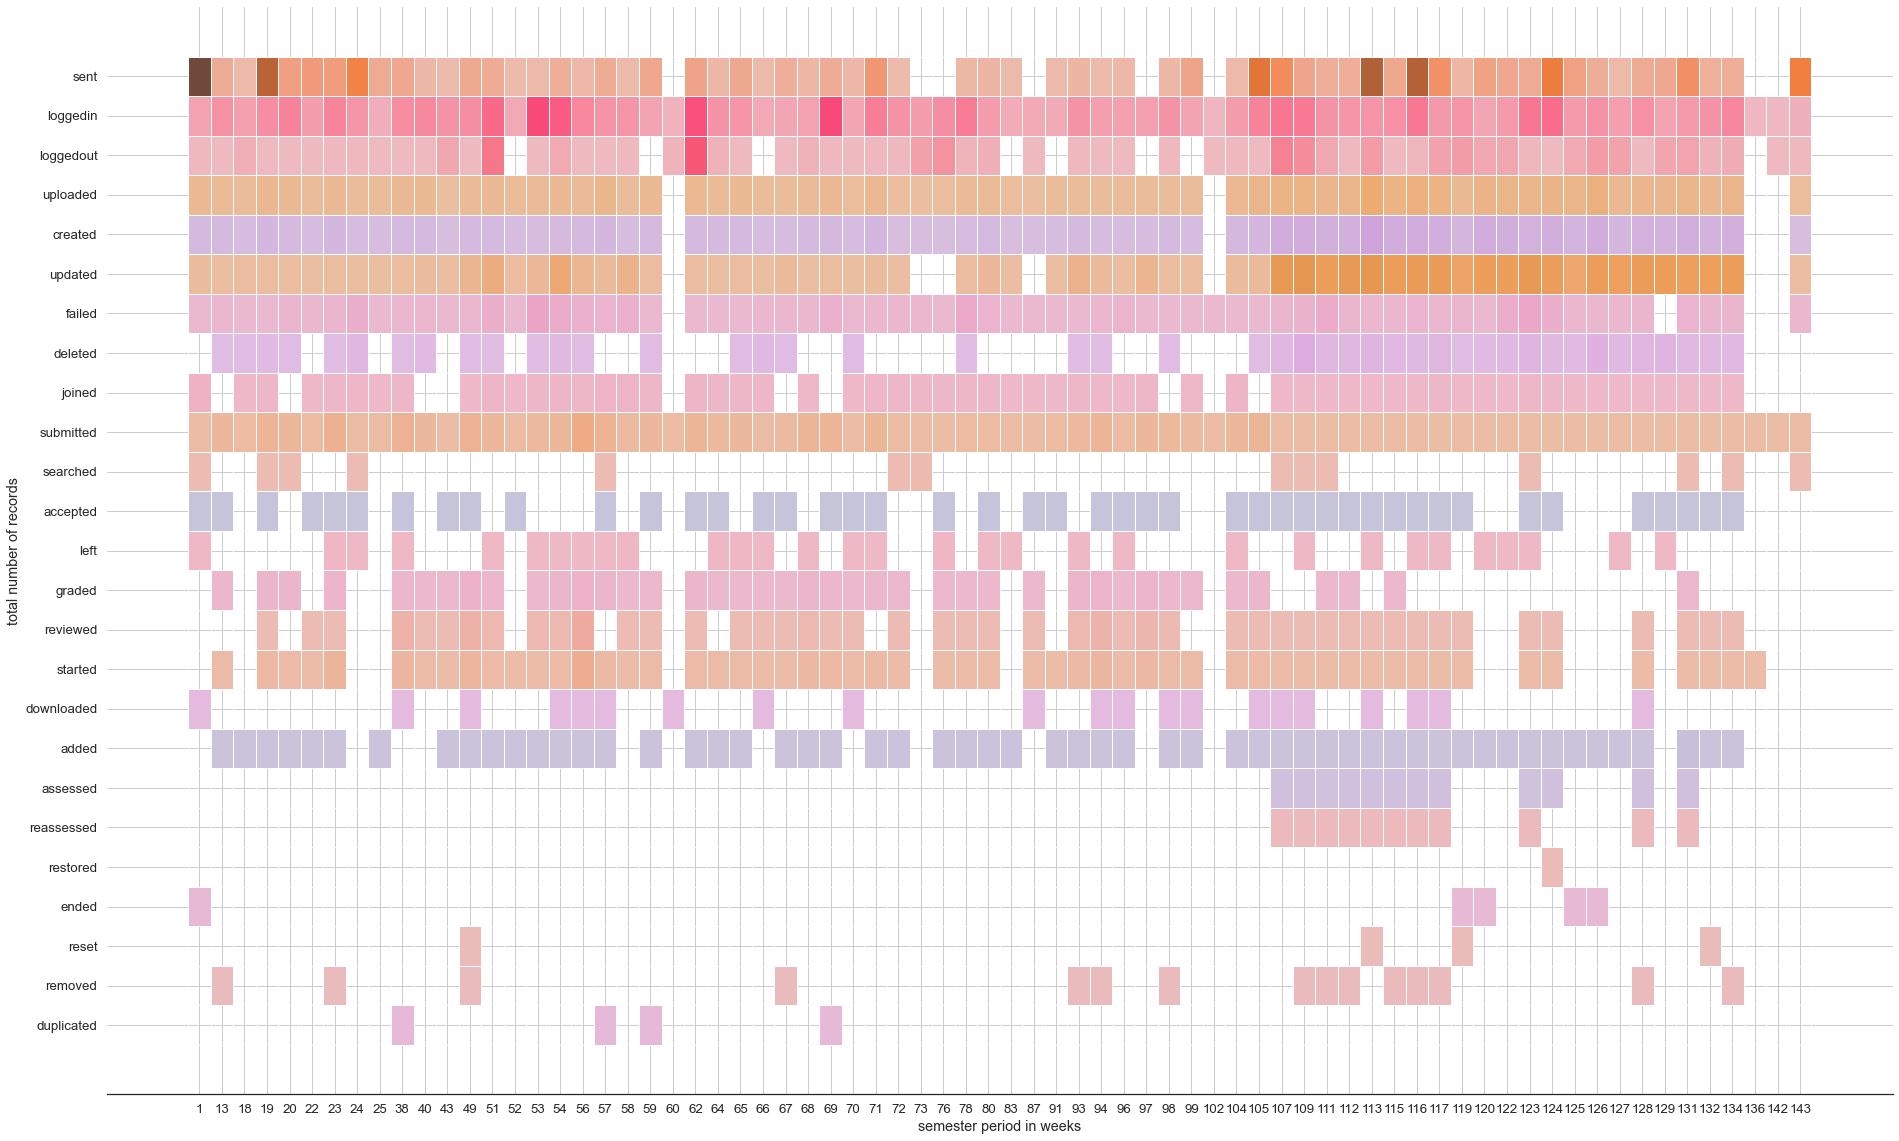

In [714]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(32, 20)) # Größe der Visualisierung (in inch)
# plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# alphabetische Sortierung der Daten zur Ausgabe der Actions in der richtigen Reihenfolge
# moodle_data_asc = moodle_data.sort_values(by='action', ignore_index=True)

moodle_data_asc = moodle_data[moodle_data.userstatus == 'student'].sort_values(by=['userid', 'action'])

# Visualisierung der Menge der Log-Einträge pro Student und Action über den Gesamtzeitraum (Betrachtung nur für durch Studenten initiierte Aktivitäten)
# zur besseren Darstellung der anderen Werte sollte die viewed-Action exkludiert werden
chart = sns.histplot(x=moodle_data_asc.userid.astype(str), y=moodle_data_asc.action[moodle_data_asc.action != 'viewed'], bins=69, hue=moodle_data_asc.action, hue_order=np.sort(moodle_data_asc.action.unique()), palette='rocket', edgecolor='white', legend=False)

# chart = sns.histplot(x=moodle_data.timecreated, bins=12, hue=moodle_data.action[(moodle_data.courseid == 28238)], hue_order=np.sort(moodle_data.action[(moodle_data.courseid == 28238)].unique()), multiple="stack", alpha=1)

# chart = sns.histplot(x=moodle_data.timecreated, bins=34, hue=moodle_data.Studiengang, hue_order=np.sort(moodle_data.Studiengang.unique()), multiple="stack", alpha=1)

# chart = sns.histplot(x=moodle_data_temp.timecreated, bins=period, discrete=True, hue=moodle_data.action[moodle_data.userid == 109], hue_order=np.sort(moodle_data.action.unique()), multiple="stack", palette='muted', alpha=1)
# chart = sns.histplot(x=md_period.timecreated, bins=period, discrete=True, hue=moodle_data.action, multiple="stack", alpha=1)
# chart = sns.histplot(x=md_period.timecreated, bins=period, discrete=True, hue=moodle_data.action[moodle_data.action != 'viewed'], multiple="stack", alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='both')
chart.set_axisbelow(True)
chart.set_xlabel('semester period in weeks')
chart.set_ylabel('total number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

In [715]:
# actions_counts_per_week = pd.DataFrame()
# for i in range(42, 54, 1):
#     actions_counts_per_week[i] = i
# for i in range(1, 23, 1):
#     actions_counts_per_week[i] = i
# display(actions_counts_per_week)



In [716]:
# actions_counts_per_week = pd.concat(moodle_data.action[moodle_data.week == 42].groupby(moodle_data.action).count())
# display(actions_counts_per_week)

In [717]:
# action_counts = moodle_data.action[moodle_data.week == 42].groupby(moodle_data.action).count()
# display(action_counts)

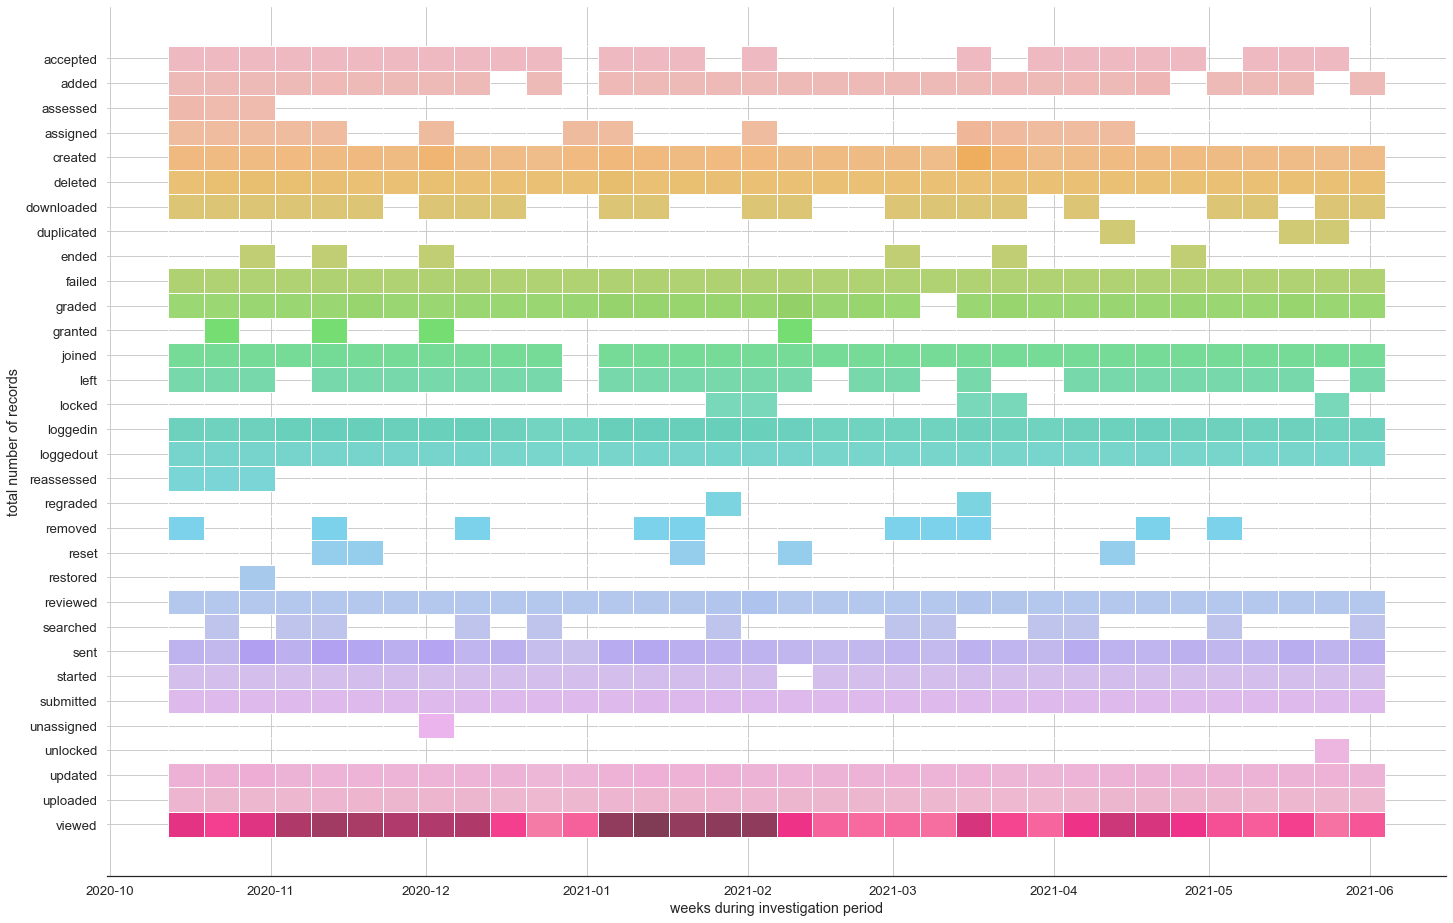

In [718]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 16)) # Größe der Visualisierung (in inch)

moodle_data_asc = moodle_data.sort_values(by='action', ignore_index=True)

# Visualisierung der Menge der Log-Einträge pro Woche und Studiengang über den Gesamtzeitraum
chart = sns.histplot(x=moodle_data_asc.timecreated, y=moodle_data_asc.action, bins=34, hue=moodle_data_asc.action, hue_order=np.sort(moodle_data_asc.action.unique()), edgecolor='white', legend=False)

# chart = sns.histplot(x=moodle_data.timecreated, bins=12, hue=moodle_data.action[(moodle_data.courseid == 28238)], hue_order=np.sort(moodle_data.action[(moodle_data.courseid == 28238)].unique()), multiple="stack", alpha=1)
# chart = sns.histplot(x=moodle_data.timecreated, bins=34, hue=moodle_data.Studiengang, hue_order=np.sort(moodle_data.Studiengang.unique()), multiple="stack", alpha=1)
# chart = sns.histplot(x=moodle_data_temp.timecreated, bins=period, discrete=True, hue=moodle_data.action[moodle_data.userid == 109], hue_order=np.sort(moodle_data.action.unique()), multiple="stack", palette='muted', alpha=1)
# chart = sns.histplot(x=md_period.timecreated, bins=period, discrete=True, hue=moodle_data.action, multiple="stack", alpha=1)
# chart = sns.histplot(x=md_period.timecreated, bins=period, discrete=True, hue=moodle_data.action[moodle_data.action != 'viewed'], multiple="stack", alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='both')
chart.set_axisbelow(True)
chart.set_xlabel('weeks during investigation period')
chart.set_ylabel('total number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Definition spezifischer Zeiträume für Vorlesungs- und Prüfungsgeschehen

&nbsp;
**Zeitraum vor Prüfungszeitraum 1 | Montag, 12.10.2020 bis Donnerstag, 21.01.2021**

In [719]:
md_before_exams_ws20 = moodle_data[moodle_data.timecreated < pd.to_datetime('2021-01-22')]
period_before_exams_ws20 = md_before_exams_ws20.year_month_day.unique().size
# md_before_exams_ws20.action[md_before_exams_ws20.userstatus == 'student'].unique().size

&nbsp;
**Prüfungszeitraum 1 | Freitag, 22.01.2021 bis Samstag, 06.02.2021**

In [720]:
md_exams1_ws20 = moodle_data[(moodle_data.timecreated > pd.to_datetime('2021-01-22')) & (moodle_data.timecreated < pd.to_datetime('2021-02-07'))]
period_exams1_ws20 = md_exams1_ws20.year_month_day.unique().size
# md_exams1_ws20.action[md_exams1_ws20.userstatus == 'student'].unique().size

&nbsp;
**Zeitraum zwischen den Prüfungszeiträumen | Sonntag, 07.02.2021 bis Donnerstag, 11.03.2021**

In [721]:
md_between_exams_ws20 = moodle_data[(moodle_data.timecreated > pd.to_datetime('2021-02-07')) & (moodle_data.timecreated < pd.to_datetime('2021-03-12'))]
period_between_exams_ws20 = md_between_exams_ws20.year_month_day.unique().size
# md_between_exams_ws20.action[md_between_exams_ws20.userstatus == 'student'].unique().size

&nbsp;
**Prüfungszeitraum 2 | Freitag, 12.03.2021 bis Samstag, 27.03.2021**

In [722]:
md_exams2_ws20 = moodle_data[(moodle_data.timecreated > pd.to_datetime('2021-03-12')) & (moodle_data.timecreated < pd.to_datetime('2021-03-28'))]
period_exams2_ws20 = md_exams2_ws20.year_month_day.unique().size
# md_exams2_ws20.action[md_exams2_ws20.userstatus == 'student'].unique().size

&nbsp;
**Zeitraum nach Prüfungszeitraum 2, inkl. Beginn des Sommersemesters 2021 | Sonntag, 28.03.2021 bis Donnerstag, 03.06.2021**

In [723]:
md_after_exams_ws20 = moodle_data[moodle_data.timecreated > pd.to_datetime('2021-03-28')]
period_after_exams_ws20 = md_after_exams_ws20.year_month_day.unique().size
# md_after_exams_ws20.action[md_after_exams_ws20.userstatus == 'student'].unique().size

### Verteilung der Log-Einträge pro Tag, Woche und Studiengang über definierte Zeiträume

&nbsp;
**Menge der Log-Einträge pro Tag und Studiengang vor Prüfungszeitraum 1**

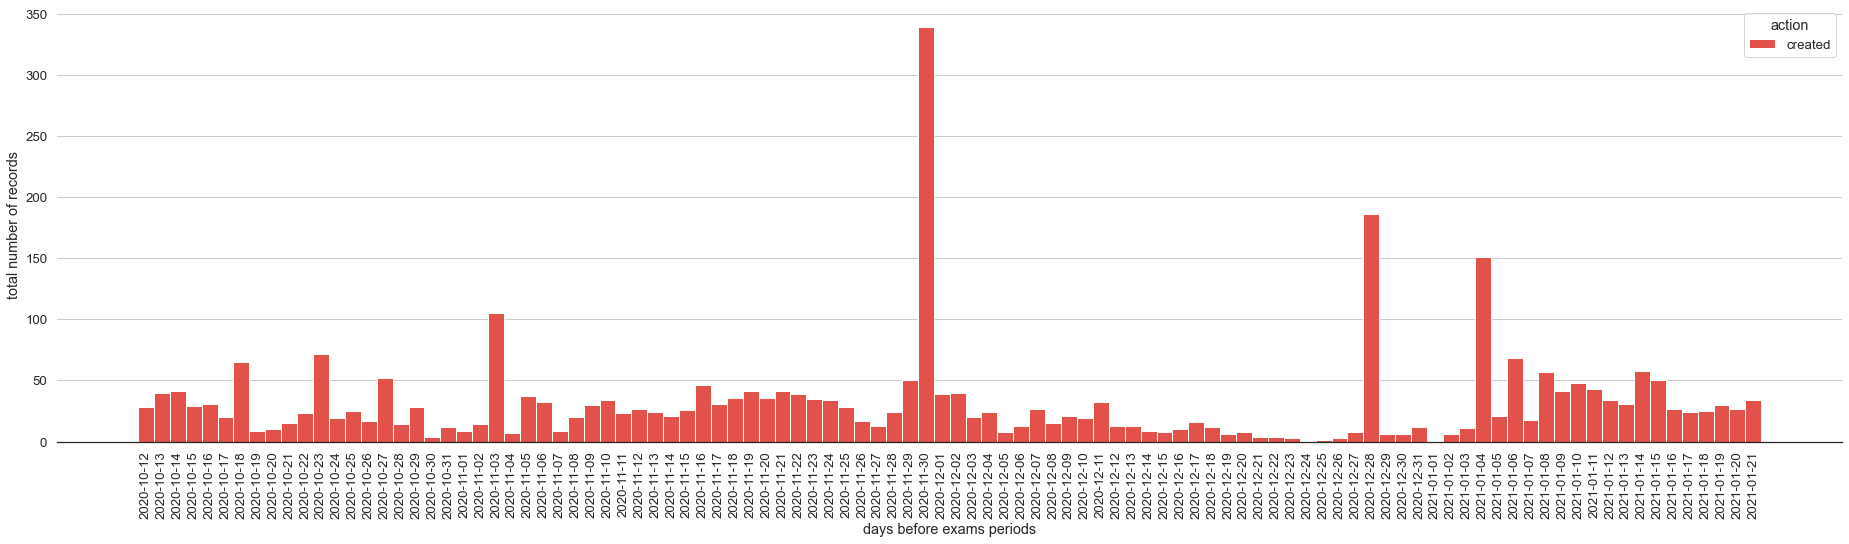

In [724]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(32, 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Tag und Studiengang im ausgewählten Zeitraum
chart = sns.histplot(x=md_before_exams_ws20.timecreated, bins=period_before_exams_ws20, hue=md_before_exams_ws20.action[(moodle_data.courseid >= 27040) & (moodle_data.action == 'created')], hue_order=np.sort(md_before_exams_ws20.action[(moodle_data.courseid >= 27040) & (moodle_data.action == 'created')].unique()), multiple="stack", alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('days before exams periods')
chart.set_ylabel('total number of records')
# chart.yaxis.set_major_locator(ticker.MultipleLocator(0.25)) # definiert die Abstände auf der y-Achse
chart.set_xticks([rect.get_x() + rect.get_width() / 2 for rect in chart.patches])
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Tag und Studiengang im Prüfungszeitraum 1**

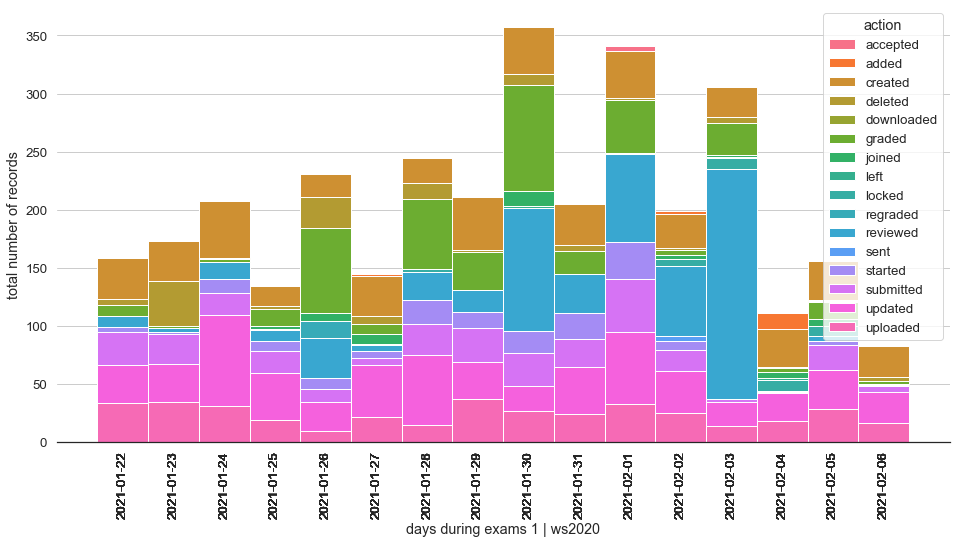

In [725]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(16, 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Tag und Studiengang im ausgewählten Zeitraum
chart = sns.histplot(x=md_exams1_ws20.timecreated, bins=period_exams1_ws20, hue=md_exams1_ws20.action[(moodle_data.courseid >= 27040) & (moodle_data.action != 'viewed')], hue_order=np.sort(md_exams1_ws20.action[(moodle_data.courseid >= 27040) & (moodle_data.action != 'viewed')].unique()), multiple="stack", alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('days during exams 1 | ws2020')
chart.set_ylabel('total number of records')
# chart.yaxis.set_major_locator(ticker.MultipleLocator(1)) # definiert die Abstände auf der y-Achse
chart.set_xticks([rect.get_x() + rect.get_width() / 2 for rect in chart.patches])
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Tag und Studiengang zwischen den Prüfungszeiträumen**

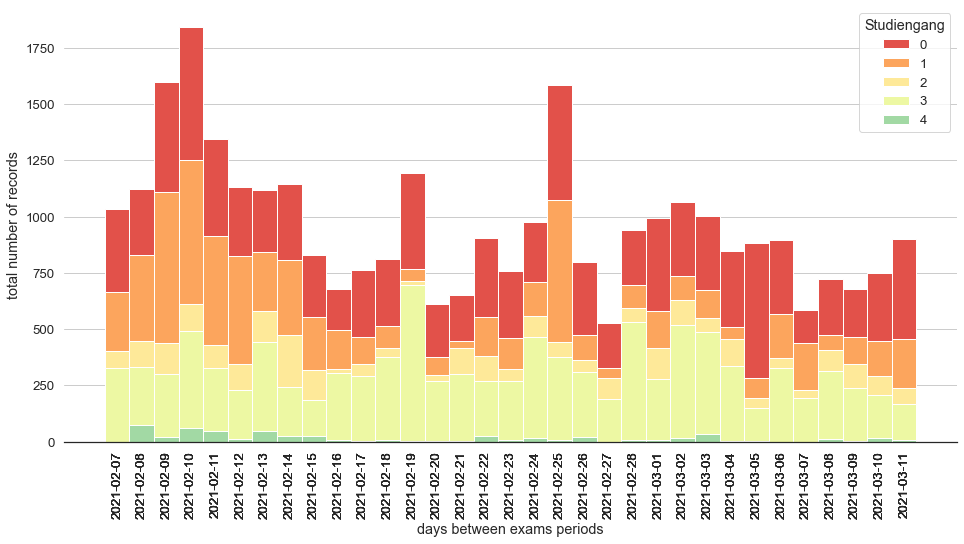

In [726]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(16, 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Tag und Studiengang im ausgewählten Zeitraum
chart = sns.histplot(x=md_between_exams_ws20.timecreated, bins=period_between_exams_ws20, hue=md_between_exams_ws20.Studiengang, hue_order=np.sort(md_between_exams_ws20.Studiengang.unique()), multiple="stack", alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('days between exams periods')
chart.set_ylabel('total number of records')
# chart.yaxis.set_major_locator(ticker.MultipleLocator(1)) # definiert die Abstände auf der y-Achse
chart.set_xticks([rect.get_x() + rect.get_width() / 2 for rect in chart.patches])
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Tag und Studiengang im Prüfungszeitraum 2**

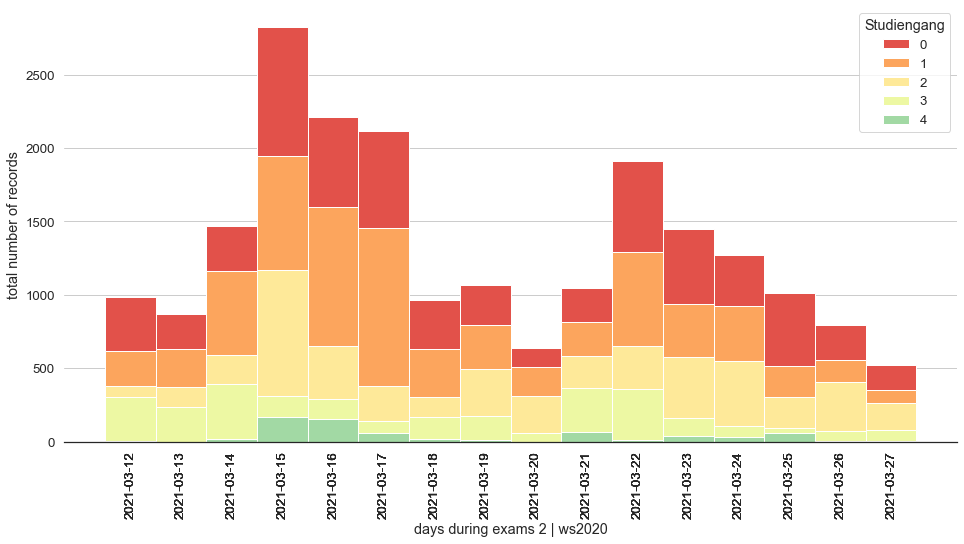

In [727]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(16, 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Tag und Studiengang im ausgewählten Zeitraum
chart = sns.histplot(x=md_exams2_ws20.timecreated, bins=period_exams2_ws20, hue=md_exams2_ws20.Studiengang, hue_order=np.sort(md_exams2_ws20.Studiengang.unique()), multiple="stack", alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('days during exams 2 | ws2020')
chart.set_ylabel('total number of records')
# chart.yaxis.set_major_locator(ticker.MultipleLocator(1)) # definiert die Abstände auf der y-Achse
chart.set_xticks([rect.get_x() + rect.get_width() / 2 for rect in chart.patches])
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Tag und Studiengang nach Prüfungszeitraum 2**

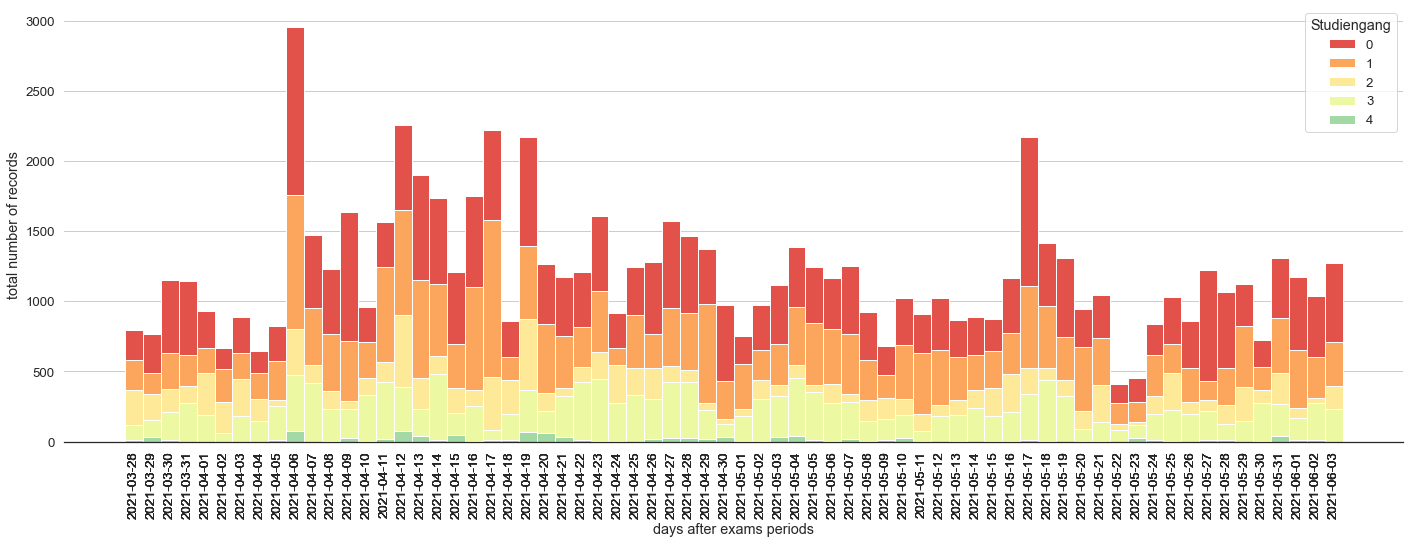

In [728]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Tag und Studiengang im ausgewählten Zeitraum
chart = sns.histplot(x=md_after_exams_ws20.timecreated, bins=period_after_exams_ws20, hue=md_after_exams_ws20.Studiengang, hue_order=np.sort(md_after_exams_ws20.Studiengang.unique()), multiple="stack", alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('days after exams periods')
chart.set_ylabel('total number of records')
# chart.yaxis.set_major_locator(ticker.MultipleLocator(1)) # definiert die Abstände auf der y-Achse
chart.set_xticks([rect.get_x() + rect.get_width() / 2 for rect in chart.patches])
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

**Ergebnis:** Auftaktveranstaltungen und erste Beschäftigungen mit Lehrmaterialien bestimmen wohl in der Zeit vom 06. bis 20. April die höheren Aktivitätszahlen. Allerdings fallen die Zahlen wieder ab und stagnieren nach ca. 4 Wochen, während im Wintersemester zu diesem Zeitpunkt die Aktivität deutlich zugenommen hat. (Peaks sollten noch untersucht werden.) Am Pfingstwochenende (22./23.5.) brechen die Zahlen ganz ein, ähnlich wie an Weihnachten und Silvester.

&nbsp;
**Menge der Log-Einträge pro Tagesstunde und Studiengang vor Prüfungszeitraum 1**

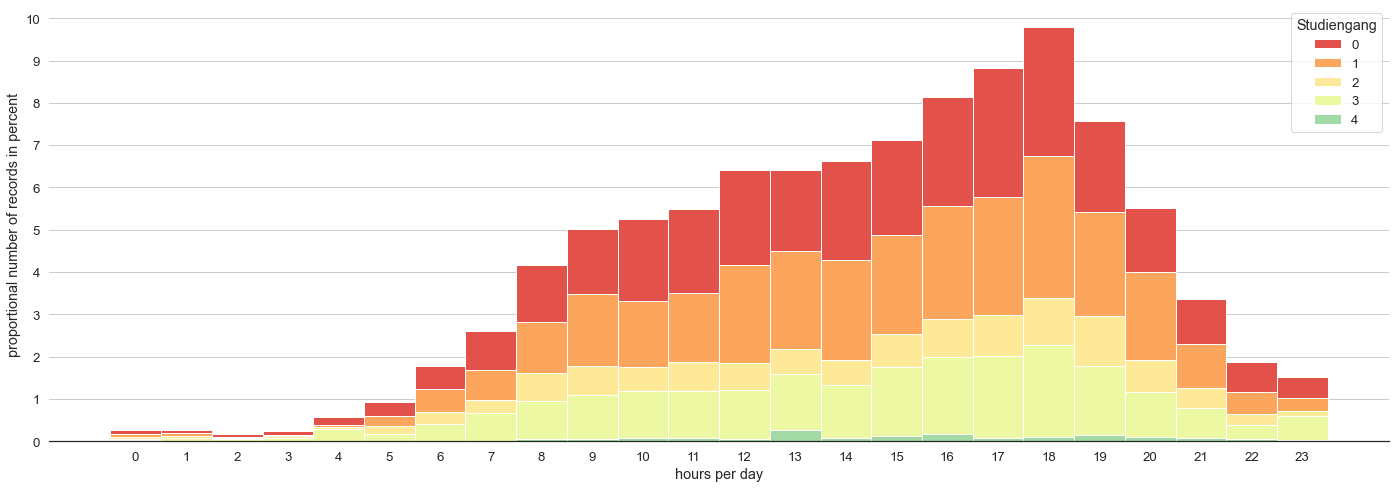

In [729]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Tagesstunde und Studiengang im ausgewählten Zeitraum
chart = sns.histplot(x=md_before_exams_ws20.timecreated.dt.hour, bins=24, discrete=True, stat="percent", hue=md_before_exams_ws20.Studiengang, hue_order=np.sort(md_before_exams_ws20.Studiengang.unique()), multiple="stack", alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('hours per day')
chart.set_ylabel('proportional number of records in percent')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.yaxis.set_major_locator(ticker.MultipleLocator(1))
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Tagesstunde und Studiengang im Prüfungszeitraum 1**

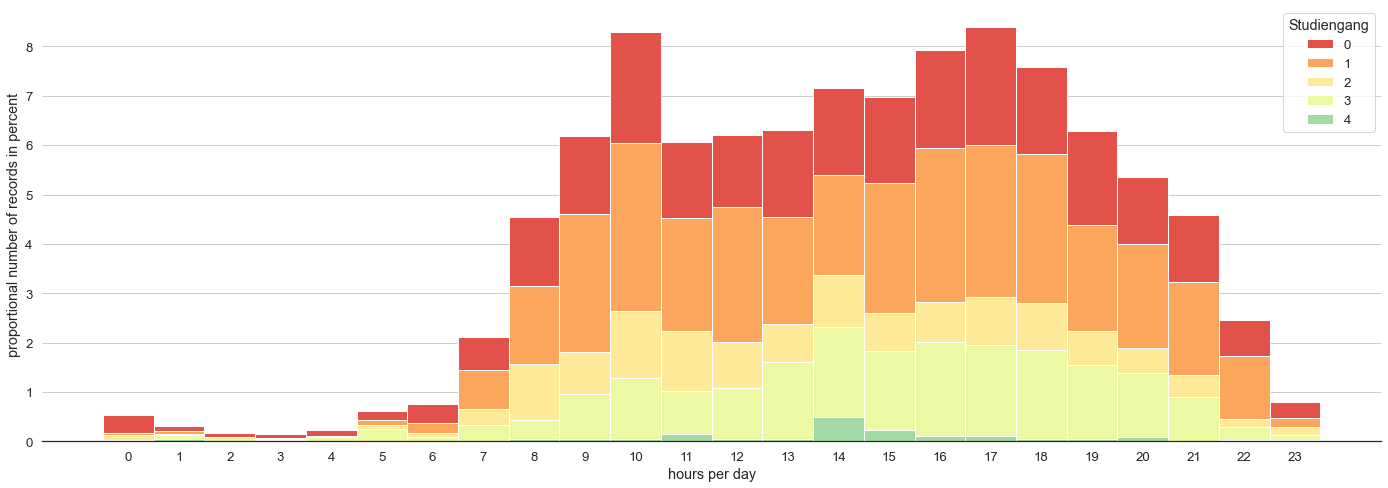

In [730]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Tagesstunde und Studiengang im ausgewählten Zeitraum
chart = sns.histplot(x=md_exams1_ws20.timecreated.dt.hour, bins=24, discrete=True, stat="percent", hue=md_exams1_ws20.Studiengang, hue_order=np.sort(md_exams1_ws20.Studiengang.unique()), multiple="stack", alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('hours per day')
chart.set_ylabel('proportional number of records in percent')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.yaxis.set_major_locator(ticker.MultipleLocator(1))
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Tagesstunde und Studiengang zwischen den Prüfungszeiträumen**

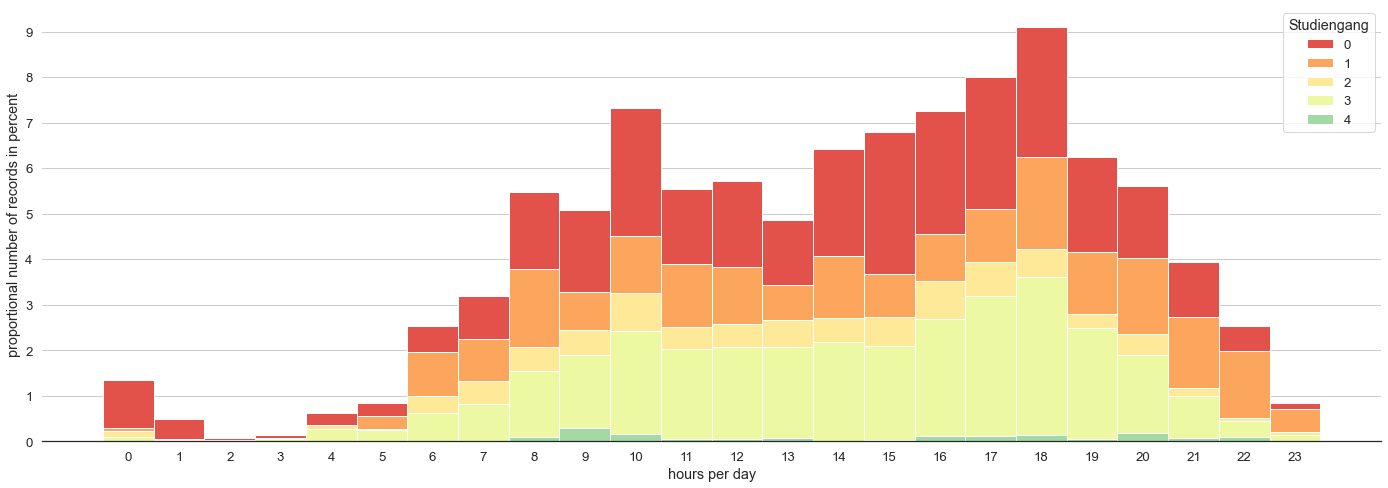

In [731]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Tagesstunde und Studiengang im ausgewählten Zeitraum
chart = sns.histplot(x=md_between_exams_ws20.timecreated.dt.hour, bins=24, discrete=True, stat="percent", hue=md_between_exams_ws20.Studiengang, hue_order=np.sort(md_between_exams_ws20.Studiengang.unique()), multiple="stack", alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('hours per day')
chart.set_ylabel('proportional number of records in percent')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.yaxis.set_major_locator(ticker.MultipleLocator(1))
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
***Menge der Log-Einträge pro Tagesstunde und Studiengang im Prüfungszeitraum 2**

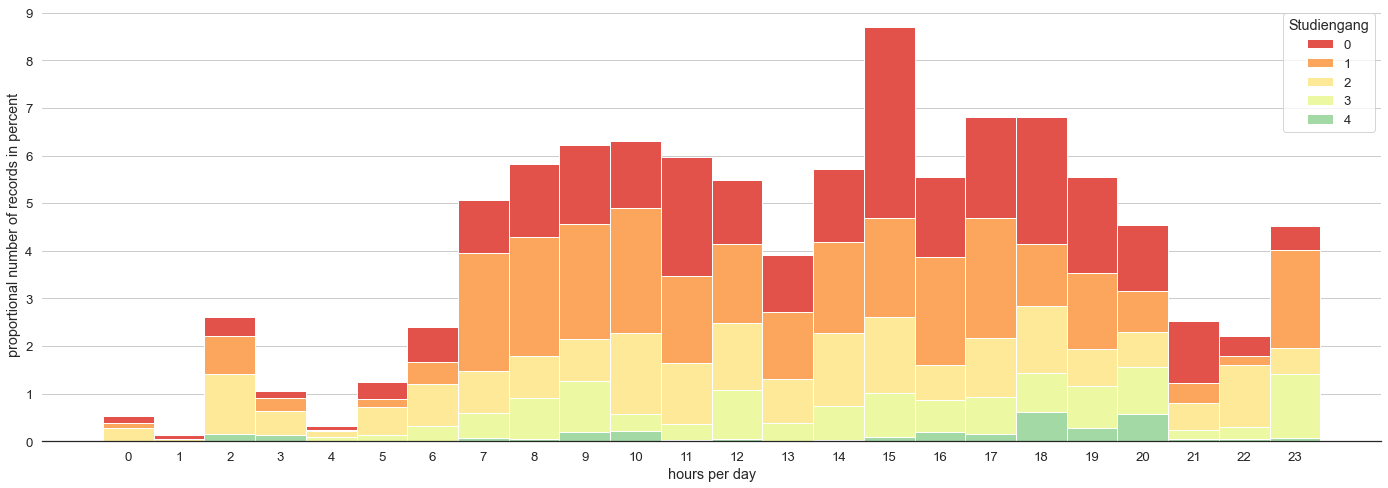

In [732]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Tagesstunde und Studiengang im ausgewählten Zeitraum
chart = sns.histplot(x=md_exams2_ws20.timecreated.dt.hour, bins=24, discrete=True, stat="percent", hue=md_exams2_ws20.Studiengang, hue_order=np.sort(md_exams2_ws20.Studiengang.unique()), multiple="stack", alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('hours per day')
chart.set_ylabel('proportional number of records in percent')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.yaxis.set_major_locator(ticker.MultipleLocator(1))
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

**Ergebnis:** Im Unterschied zu allen anderen Zeiträumen war eine stärkere Aktivität spät am Abend und auch nachts zu verzeichnen. Der Peak um 15 Uhr könnte auf eine stärkere Kommunikation hindeuten, da die Aktivität im Studiengang 0 deutlich mehr Gewicht hat. Insgesamt zeigen die Ergebnisse der Prüfungszeiträume mehr Volatilität, was auch mit der geringeren Menge der Daten zu tun haben könnte.

&nbsp;
***Menge der Log-Einträge pro Tagesstunde und Studiengang nach Prüfungszeitraum 2**

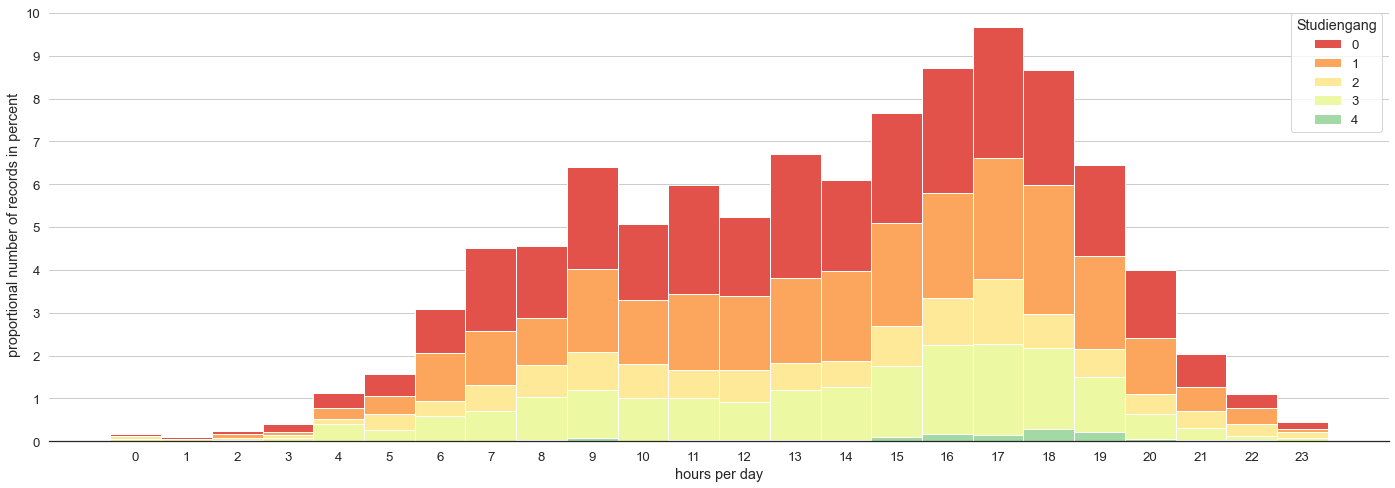

In [733]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Tagesstunde und Studiengang im ausgewählten Zeitraum
chart = sns.histplot(x=md_after_exams_ws20.timecreated.dt.hour, bins=24, discrete=True, stat="percent", hue=md_after_exams_ws20.Studiengang, hue_order=np.sort(md_after_exams_ws20.Studiengang.unique()), multiple="stack", alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('hours per day')
chart.set_ylabel('proportional number of records in percent')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.yaxis.set_major_locator(ticker.MultipleLocator(1))
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Wochentag und Studiengang vor Prüfungszeitraum 1**

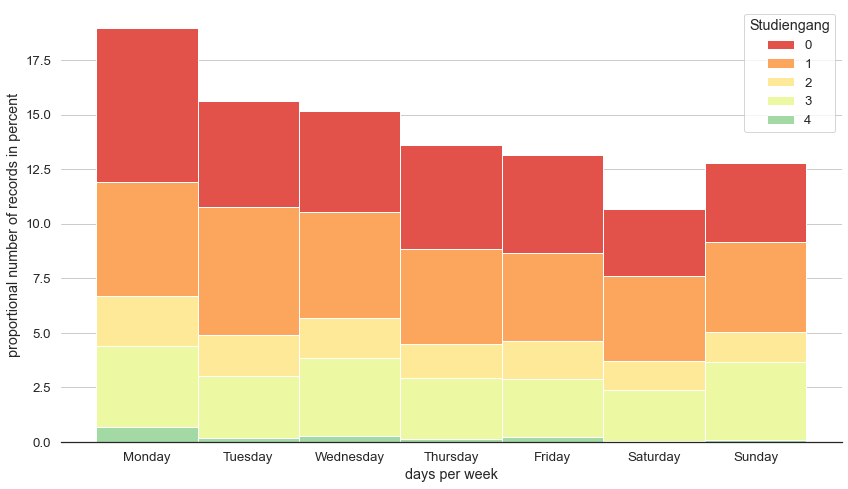

In [734]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(14, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Wochentag und Studiengang im ausgewählten Zeitraum
chart = sns.histplot(x=md_before_exams_ws20.timecreated.dt.weekday, bins=7, discrete=True, stat="percent", hue=md_before_exams_ws20.Studiengang, hue_order=np.sort(md_before_exams_ws20.Studiengang.unique()), multiple="stack", alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('days per week')
chart.set_ylabel('proportional number of records in percent')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.yaxis.set_major_locator(ticker.MultipleLocator(2.5))
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Wochentag und Studiengang im Prüfungszeitraum 1**

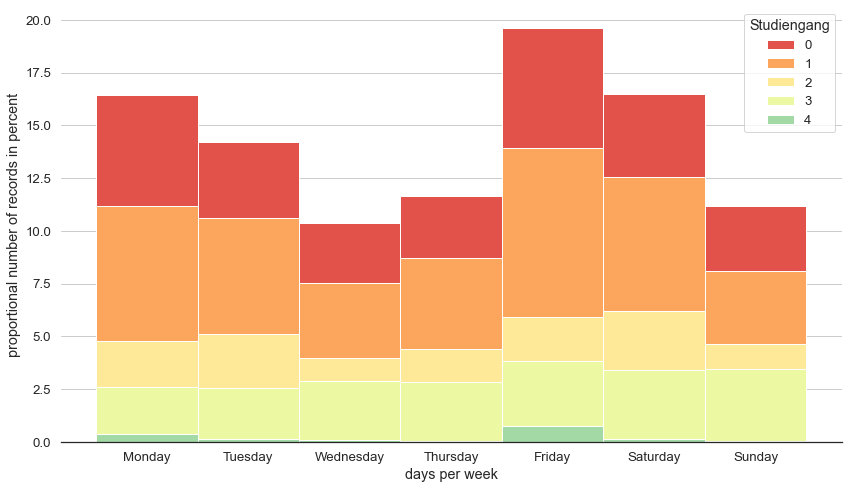

In [735]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(14, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Wochentag und Studiengang im ausgewählten Zeitraum
chart = sns.histplot(x=md_exams1_ws20.timecreated.dt.weekday, bins=7, discrete=True, stat="percent", hue=md_exams1_ws20.Studiengang, hue_order=np.sort(md_exams1_ws20.Studiengang.unique()), multiple="stack", alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('days per week')
chart.set_ylabel('proportional number of records in percent')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.yaxis.set_major_locator(ticker.MultipleLocator(2.5))
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Wochentag und Studiengang zwischen den Prüfungszeiträumen**

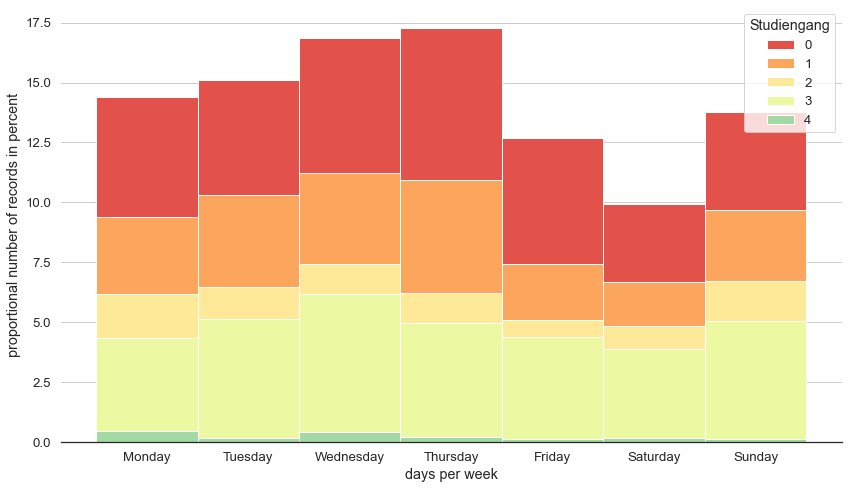

In [736]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(14, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Wochentag und Studiengang im ausgewählten Zeitraum
chart = sns.histplot(x=md_between_exams_ws20.timecreated.dt.weekday, bins=7, discrete=True, stat="percent", hue=md_between_exams_ws20.Studiengang, hue_order=np.sort(md_between_exams_ws20.Studiengang.unique()), multiple="stack", alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('days per week')
chart.set_ylabel('proportional number of records in percent')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.yaxis.set_major_locator(ticker.MultipleLocator(2.5))
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Wochentag und Studiengang im Prüfungszeitraum 2**

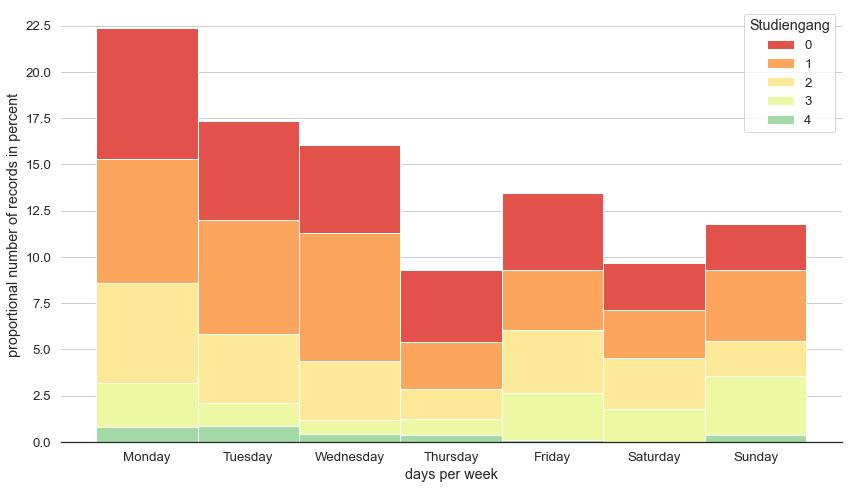

In [737]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(14, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Wochentag und Studiengang im ausgewählten Zeitraum
chart = sns.histplot(x=md_exams2_ws20.timecreated.dt.weekday, bins=7, discrete=True, stat="percent", hue=md_exams2_ws20.Studiengang, hue_order=np.sort(md_exams2_ws20.Studiengang.unique()), multiple="stack", alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('days per week')
chart.set_ylabel('proportional number of records in percent')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.yaxis.set_major_locator(ticker.MultipleLocator(2.5))
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Wochentag und Studiengang nach Prüfungszeitraum 2**

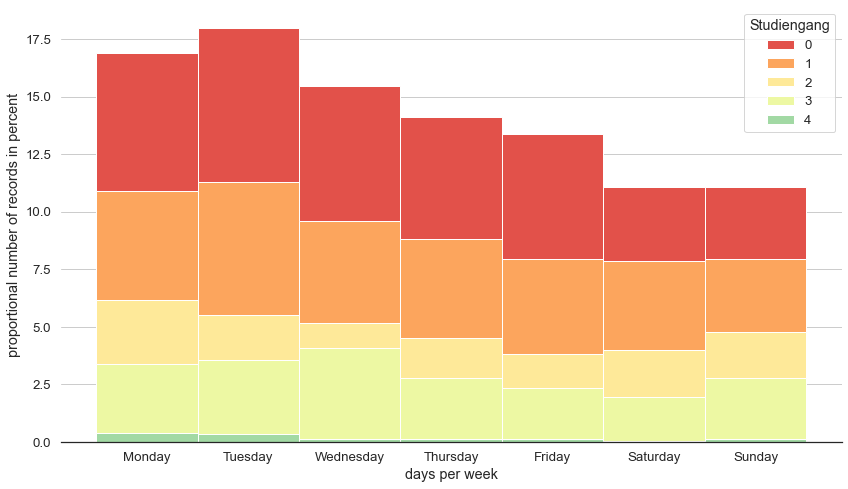

In [738]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(14, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Wochentag und Studiengang im ausgewählten Zeitraum
chart = sns.histplot(x=md_after_exams_ws20.timecreated.dt.weekday, bins=7, discrete=True, stat="percent", hue=md_after_exams_ws20.Studiengang, hue_order=np.sort(md_after_exams_ws20.Studiengang.unique()), multiple="stack", alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('days per week')
chart.set_ylabel('proportional number of records in percent')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.yaxis.set_major_locator(ticker.MultipleLocator(2.5))
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()